In [306]:
import pandas as pd
import numpy as np
import geopandas as gpd
import re

In [307]:
df = pd.read_csv(r"C:\Users\steph\Documents\3901922.csv")
df.head(10)

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,US1NYSF0034,"BAY SHORE 0.5 ESE, NY US",2018-01,NaN,NaN,NaN
1,US1NYER0104,"WILLIAMSVILLE 2.2 NNW, NY US",2018-01,NaN,NaN,NaN
2,US1NYST0010,"SAVONA 4.7 S, NY US",2018-01,NaN,NaN,NaN
3,USC00307484,"SARATOGA SPRINGS 4 SW, NY US",2018-01,21.6,32.1,11.2
4,USC00306276,"ORIENT POINT STATE PARK, NY US",2018-01,29.5,36.9,22.2
5,USC00308577,"SYOSSET, NY US",2018-01,28.6,36.1,21.1
6,USC00308455,"THERESA 4 NW, NY US",2018-01,NaN,NaN,NaN
7,US1NYST0004,"BIG FLATS 2.0 W, NY US",2018-01,NaN,NaN,NaN
8,US1NYST0003,"SOUTH CORNING 4.7 S, NY US",2018-01,NaN,NaN,NaN
9,US1NYER0102,"CHEEKTOWAGA 2.7 NE, NY US",2018-01,NaN,NaN,NaN


In [308]:
df['TAVG'] = pd.to_numeric(df['TAVG'], errors='coerce')

In [309]:
median_temp = df['TAVG'].median()

In [310]:
df['TAVG'] = df['TAVG'].fillna(median_temp)
print(df.head(10))
print()
print(df['TAVG'].isnull().sum())

       STATION                            NAME     DATE  TAVG  TMAX  TMIN
0  US1NYSF0034        BAY SHORE 0.5 ESE, NY US  2018-01  20.6   NaN   NaN
1  US1NYER0104    WILLIAMSVILLE 2.2 NNW, NY US  2018-01  20.6   NaN   NaN
2  US1NYST0010             SAVONA 4.7 S, NY US  2018-01  20.6   NaN   NaN
3  USC00307484    SARATOGA SPRINGS 4 SW, NY US  2018-01  21.6  32.1  11.2
4  USC00306276  ORIENT POINT STATE PARK, NY US  2018-01  29.5  36.9  22.2
5  USC00308577                  SYOSSET, NY US  2018-01  28.6  36.1  21.1
6  USC00308455             THERESA 4 NW, NY US  2018-01  20.6   NaN   NaN
7  US1NYST0004          BIG FLATS 2.0 W, NY US  2018-01  20.6   NaN   NaN
8  US1NYST0003      SOUTH CORNING 4.7 S, NY US  2018-01  20.6   NaN   NaN
9  US1NYER0102       CHEEKTOWAGA 2.7 NE, NY US  2018-01  20.6   NaN   NaN

0


In [311]:


# Function to extract the county name
def extract_county(location):
    # Split by comma and take the first part
    county = location.split(',')[0]  # Isolate the part before the comma
    # Use regex to find all parts before any number
    match = re.match(r"([^0-9]+)", county)
    if match:
        return match.group(1).strip()  # Return the matched part, removing leading/trailing spaces
    return county.strip()  # Fallback to original if no match

# Apply the function to the Location column
df['County'] = df['NAME'].apply(extract_county)

print(df[['NAME', 'County']])


                               NAME                   County
0          BAY SHORE 0.5 ESE, NY US                BAY SHORE
1      WILLIAMSVILLE 2.2 NNW, NY US            WILLIAMSVILLE
2               SAVONA 4.7 S, NY US                   SAVONA
3      SARATOGA SPRINGS 4 SW, NY US         SARATOGA SPRINGS
4    ORIENT POINT STATE PARK, NY US  ORIENT POINT STATE PARK
..                              ...                      ...
420       WEST SENECA 1.5 NW, NY US              WEST SENECA
421        WEST HURLEY 0.1 S, NY US              WEST HURLEY
422           KINGSTON 2.1 N, NY US                 KINGSTON
423        LANCASTER 1.9 SSE, NY US                LANCASTER
424      ULSTER PARK 0.9 NNW, NY US              ULSTER PARK

[425 rows x 2 columns]


In [312]:

# Function to extract the county name
def extract_county(location):
    # Split by comma and take the first part
    county = location.split(',')[0].strip()  # Isolate and strip the part before the comma
    # Remove trailing numbers and spaces
    county = re.sub(r'\s*\d+(\.\d+)?\s*$', '', county)  # Remove any trailing numbers
    return county.strip()  # Return the cleaned county name

# Apply the function to the NAME column
df['County'] = df['NAME'].apply(extract_county)

print(df[['NAME', 'County']])


                               NAME                   County
0          BAY SHORE 0.5 ESE, NY US        BAY SHORE 0.5 ESE
1      WILLIAMSVILLE 2.2 NNW, NY US    WILLIAMSVILLE 2.2 NNW
2               SAVONA 4.7 S, NY US             SAVONA 4.7 S
3      SARATOGA SPRINGS 4 SW, NY US    SARATOGA SPRINGS 4 SW
4    ORIENT POINT STATE PARK, NY US  ORIENT POINT STATE PARK
..                              ...                      ...
420       WEST SENECA 1.5 NW, NY US       WEST SENECA 1.5 NW
421        WEST HURLEY 0.1 S, NY US        WEST HURLEY 0.1 S
422           KINGSTON 2.1 N, NY US           KINGSTON 2.1 N
423        LANCASTER 1.9 SSE, NY US        LANCASTER 1.9 SSE
424      ULSTER PARK 0.9 NNW, NY US      ULSTER PARK 0.9 NNW

[425 rows x 2 columns]


In [313]:
# Remove numerical values from the 'County' column
df['County'] = df['County'].apply(lambda x: re.sub(r'\d+(\.\d+)?', '', str(x)).strip())


In [314]:
df['County'].unique()

array(['BAY SHORE  ESE', 'WILLIAMSVILLE  NNW', 'SAVONA  S',
       'SARATOGA SPRINGS  SW', 'ORIENT POINT STATE PARK', 'SYOSSET',
       'THERESA  NW', 'BIG FLATS  W', 'SOUTH CORNING  S',
       'CHEEKTOWAGA  NE', 'ROCHESTER  NNW', 'BENNETTS BRIDGE',
       'SYRACUSE  S', 'SHIRLEY  N', 'SAYVILLE  SSE', 'OGDENSBURG  NE',
       'RIVERHEAD RESEARCH FARM', 'NORTH TONAWANDA', 'TRENTON FALLS',
       'MONTGOMERY ORANGE CO AIRPORT', 'ROCHESTER  WNW', 'WEST SENECA  E',
       'WEBSTER  W', 'CLAY  SE', 'ISLIP LI MACARTHUR AIRPORT',
       'SKANEATELES  NNW', 'CONKLINGVILLE DAM', 'PITTSFORD  SSE',
       'STAFFORD  NE', 'BRIDGEWATER  SSE', 'BOHEMIA  ENE',
       'COOPERSTOWN  S', 'MILLBROOK  SE', 'HOPEWELL JUNCTION  SSE',
       'WAPPINGERS FALLS  ESE', 'PALERMO  SSE', 'BROCKPORT  WNW',
       'BLACK RIVER', 'HARTWICK', 'WEST ISLIP  SW', 'BATAVIA  W',
       'BATAVIA  WSW', 'KEENE VALLEY  NE', 'BALDWINSVILLE  NE',
       'KEESEVILLE  SE', 'OLMSTEDVILLE  NNE', 'CENTERPORT  SW',
       'LAKE GROVE

In [315]:
df['County'] = df['County'].str.replace('County', '')
df['County'].unique()

array(['BAY SHORE  ESE', 'WILLIAMSVILLE  NNW', 'SAVONA  S',
       'SARATOGA SPRINGS  SW', 'ORIENT POINT STATE PARK', 'SYOSSET',
       'THERESA  NW', 'BIG FLATS  W', 'SOUTH CORNING  S',
       'CHEEKTOWAGA  NE', 'ROCHESTER  NNW', 'BENNETTS BRIDGE',
       'SYRACUSE  S', 'SHIRLEY  N', 'SAYVILLE  SSE', 'OGDENSBURG  NE',
       'RIVERHEAD RESEARCH FARM', 'NORTH TONAWANDA', 'TRENTON FALLS',
       'MONTGOMERY ORANGE CO AIRPORT', 'ROCHESTER  WNW', 'WEST SENECA  E',
       'WEBSTER  W', 'CLAY  SE', 'ISLIP LI MACARTHUR AIRPORT',
       'SKANEATELES  NNW', 'CONKLINGVILLE DAM', 'PITTSFORD  SSE',
       'STAFFORD  NE', 'BRIDGEWATER  SSE', 'BOHEMIA  ENE',
       'COOPERSTOWN  S', 'MILLBROOK  SE', 'HOPEWELL JUNCTION  SSE',
       'WAPPINGERS FALLS  ESE', 'PALERMO  SSE', 'BROCKPORT  WNW',
       'BLACK RIVER', 'HARTWICK', 'WEST ISLIP  SW', 'BATAVIA  W',
       'BATAVIA  WSW', 'KEENE VALLEY  NE', 'BALDWINSVILLE  NE',
       'KEESEVILLE  SE', 'OLMSTEDVILLE  NNE', 'CENTERPORT  SW',
       'LAKE GROVE

In [316]:
df

,STATION,NAME,DATE,TAVG,TMAX,TMIN,County
0,US1NYSF0034,"BAY SHORE 0.5 ESE, NY US",2018-01,20.6,NaN,NaN,BAY SHORE ESE
1,US1NYER0104,"WILLIAMSVILLE 2.2 NNW, NY US",2018-01,20.6,NaN,NaN,WILLIAMSVILLE NNW
2,US1NYST0010,"SAVONA 4.7 S, NY US",2018-01,20.6,NaN,NaN,SAVONA S
3,USC00307484,"SARATOGA SPRINGS 4 SW, NY US",2018-01,21.6,32.1,11.2,SARATOGA SPRINGS SW
4,USC00306276,"ORIENT POINT STATE PARK, NY US",2018-01,29.5,36.9,22.2,ORIENT POINT STATE PARK
...,...,...,...,...,...,...,...
420,US1NYER0135,"WEST SENECA 1.5 NW, NY US",2018-01,20.6,NaN,NaN,WEST SENECA NW
421,US1NYUL0023,"WEST HURLEY 0.1 S, NY US",2018-01,20.6,NaN,NaN,WEST HURLEY S
422,US1NYUL0022,"KINGSTON 2.1 N, NY US",2018-01,20.6,NaN,NaN,KINGSTON N
423,US1NYER0132,"LANCASTER 1.9 SSE, NY US",2018-01,20.6,NaN,NaN,LANCASTER SSE


In [317]:
df = pd.read_csv(r"C:\Users\steph\Documents\cleaned_data.csv")
df.head()

,STATION,NAME,DATE,TAVG,TMAX,TMIN,County
0,US1NYSF0034,"BAY SHORE 0.5 ESE, NY US",2018-01,20.6,NaN,NaN,BAY SHORE
1,US1NYER0104,"WILLIAMSVILLE 2.2 NNW, NY US",2018-01,20.6,NaN,NaN,WILLIAMSVILLE
2,US1NYST0010,"SAVONA 4.7 S, NY US",2018-01,20.6,NaN,NaN,SAVONA
3,USC00307484,"SARATOGA SPRINGS 4 SW, NY US",2018-01,21.6,32.1,11.2,SARATOGA SPRINGS
4,USC00306276,"ORIENT POINT STATE PARK, NY US",2018-01,29.5,36.9,22.2,ORIENT POINT


In [318]:
gdp = gpd.read_file(r"C:\Users\steph\Desktop\ICDS Final\GIS\cb_2018_36_bg_500k.shp")
print(gdp.columns)

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'AFFGEOID', 'GEOID',
       'NAME', 'LSAD', 'ALAND', 'AWATER', 'geometry'],
      dtype='object')


In [319]:
print(gdp.shape[0])
gdp.head()

15406


,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,36,103,110401,1,1500000US361031104011,361031104011,1,BG,534139,0,"POLYGON ((-73.39876 40.90351, -73.3937 40.9041..."
1,36,119,005600,1,1500000US361190056001,361190056001,1,BG,312476,180612,"POLYGON ((-73.77278 40.8846, -73.77231 40.8873..."
2,36,067,011402,3,1500000US360670114023,360670114023,3,BG,45275086,887109,"POLYGON ((-76.47922 43.22752, -76.45088 43.228..."
3,36,069,051400,2,1500000US360690514002,360690514002,2,BG,46193661,0,"POLYGON ((-77.13097 42.86094, -77.12125 42.861..."
4,36,061,018600,2,1500000US360610186002,360610186002,2,BG,48762,0,"POLYGON ((-73.95153 40.79946, -73.95007 40.798..."


In [320]:
gdp['COUNTYFP'].unique()

array(['103', '119', '067', '069', '061', '029', '047', '081', '019',
       '085', '015', '055', '027', '093', '059', '117', '005', '063',
       '109', '065', '021', '009', '037', '011', '007', '071', '051',
       '017', '105', '001', '035', '013', '101', '091', '083', '073',
       '075', '045', '033', '121', '111', '023', '039', '089', '099',
       '113', '087', '079', '003', '031', '057', '123', '043', '077',
       '049', '107', '053', '025', '095', '115', '041', '097'],
      dtype=object)

In [321]:
ny_county_fips = {
    'ALBANY': '001',
    'ALLEGANY': '003',
    'BRONX': '005',
    'BROOME': '007',
    'CATTARAUGUS': '009',
    'CAYUGA': '011',
    'CHAUTAUQUA': '013',
    'CHEMUNG': '015',
    'CHENANGO': '017',
    'CLINTON': '019',
    'COLUMBIA': '021',
    'CORTLAND': '023',
    'DELAWARE': '025',
    'DUTCHESS': '027',
    'ERIE': '029',
    'ESSEX': '031',
    'FRANKLIN': '033',
    'FULTON': '035',
    'GENESEE': '037',
    'GREENE': '039',
    'HAMILTON': '041',
    'HERKIMER': '043',
    'JEFFERSON': '045',
    'KINGS': '047',
    'LEWIS': '049',
    'LIVINGSTON': '051',
    'MADISON': '053',
    'MONROE': '055',
    'MONTGOMERY': '057',
    'NASSAU': '059',
    'NEW YORK': '061',
    'NIAGARA': '063',
    'ONEIDA': '065',
    'ONONDAGA': '067',
    'ONTARIO': '069',
    'ORANGE': '071',
    'ORLEANS': '073',
    'OSWEGO': '075',
    'OTSEGO': '077',
    'PUTNAM': '079',
    'QUEENS': '081',
    'RENSSELAER': '083',
    'RICHMOND': '085',
    'ROCKLAND': '087',
    'SARATOGA': '091',
    'SCHENECTADY': '093',
    'SCHOHARIE': '095',
    'SCHUYLER': '097',
    'SENECA': '099',
    'ST LAWRENCE': '089',
    'STEUBEN': '101',
    'SUFFOLK': '103',
    'SULLIVAN': '105',
    'TIOGA': '107',
    'TOMPKINS': '109',
    'ULSTER': '111',
    'WARREN': '113',
    'WASHINGTON': '115',
    'WAYNE': '117',
    'WESTCHESTER': '119',
    'WYOMING': '121',
    'YATES': '123'
}


In [322]:
df2 = pd.DataFrame(ny_county_fips.items(), columns=['County', 'FIPS'])
df2.head()

,County,FIPS
0,ALBANY,001
1,ALLEGANY,003
2,BRONX,005
3,BROOME,007
4,CATTARAUGUS,009


In [323]:
df.drop(['TMAX' , 'TMIN'] ,axis=1, inplace = True)	

In [324]:
df

,STATION,NAME,DATE,TAVG,County
0,US1NYSF0034,"BAY SHORE 0.5 ESE, NY US",2018-01,20.6,BAY SHORE
1,US1NYER0104,"WILLIAMSVILLE 2.2 NNW, NY US",2018-01,20.6,WILLIAMSVILLE
2,US1NYST0010,"SAVONA 4.7 S, NY US",2018-01,20.6,SAVONA
3,USC00307484,"SARATOGA SPRINGS 4 SW, NY US",2018-01,21.6,SARATOGA SPRINGS
4,USC00306276,"ORIENT POINT STATE PARK, NY US",2018-01,29.5,ORIENT POINT
...,...,...,...,...,...
420,US1NYER0135,"WEST SENECA 1.5 NW, NY US",2018-01,20.6,WEST SENECA
421,US1NYUL0023,"WEST HURLEY 0.1 S, NY US",2018-01,20.6,WEST HURLEY
422,US1NYUL0022,"KINGSTON 2.1 N, NY US",2018-01,20.6,KINGSTON
423,US1NYER0132,"LANCASTER 1.9 SSE, NY US",2018-01,20.6,LANCASTER


In [325]:
gdp.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,36,103,110401,1,1500000US361031104011,361031104011,1,BG,534139,0,"POLYGON ((-73.39876 40.90351, -73.3937 40.9041..."
1,36,119,005600,1,1500000US361190056001,361190056001,1,BG,312476,180612,"POLYGON ((-73.77278 40.8846, -73.77231 40.8873..."
2,36,067,011402,3,1500000US360670114023,360670114023,3,BG,45275086,887109,"POLYGON ((-76.47922 43.22752, -76.45088 43.228..."
3,36,069,051400,2,1500000US360690514002,360690514002,2,BG,46193661,0,"POLYGON ((-77.13097 42.86094, -77.12125 42.861..."
4,36,061,018600,2,1500000US360610186002,360610186002,2,BG,48762,0,"POLYGON ((-73.95153 40.79946, -73.95007 40.798..."


In [326]:
df2

,County,FIPS
0,ALBANY,001
1,ALLEGANY,003
2,BRONX,005
3,BROOME,007
4,CATTARAUGUS,009
...,...,...
57,WASHINGTON,115
58,WAYNE,117
59,WESTCHESTER,119
60,WYOMING,121


In [327]:
df2.rename(columns={'FIPS': 'COUNTYFP'}, inplace=True)

In [328]:
df.rename(columns = {'County': 'City'} , inplace = True)
df = pd.DataFrame(df)
df.head()

,STATION,NAME,DATE,TAVG,City
0,US1NYSF0034,"BAY SHORE 0.5 ESE, NY US",2018-01,20.6,BAY SHORE
1,US1NYER0104,"WILLIAMSVILLE 2.2 NNW, NY US",2018-01,20.6,WILLIAMSVILLE
2,US1NYST0010,"SAVONA 4.7 S, NY US",2018-01,20.6,SAVONA
3,USC00307484,"SARATOGA SPRINGS 4 SW, NY US",2018-01,21.6,SARATOGA SPRINGS
4,USC00306276,"ORIENT POINT STATE PARK, NY US",2018-01,29.5,ORIENT POINT


In [329]:
df2 = pd.DataFrame(df2)
df2.head()
df2.shape[0]

62

In [330]:
result = pd.concat([df, df2], axis=1)
print(result.head())

       STATION                            NAME     DATE  TAVG  \
0  US1NYSF0034        BAY SHORE 0.5 ESE, NY US  2018-01  20.6   
1  US1NYER0104    WILLIAMSVILLE 2.2 NNW, NY US  2018-01  20.6   
2  US1NYST0010             SAVONA 4.7 S, NY US  2018-01  20.6   
3  USC00307484    SARATOGA SPRINGS 4 SW, NY US  2018-01  21.6   
4  USC00306276  ORIENT POINT STATE PARK, NY US  2018-01  29.5   

               City       County COUNTYFP  
0         BAY SHORE       ALBANY      001  
1     WILLIAMSVILLE     ALLEGANY      003  
2            SAVONA        BRONX      005  
3  SARATOGA SPRINGS       BROOME      007  
4      ORIENT POINT  CATTARAUGUS      009  


In [331]:
result

,STATION,NAME,DATE,TAVG,City,County,COUNTYFP
0,US1NYSF0034,"BAY SHORE 0.5 ESE, NY US",2018-01,20.6,BAY SHORE,ALBANY,001
1,US1NYER0104,"WILLIAMSVILLE 2.2 NNW, NY US",2018-01,20.6,WILLIAMSVILLE,ALLEGANY,003
2,US1NYST0010,"SAVONA 4.7 S, NY US",2018-01,20.6,SAVONA,BRONX,005
3,USC00307484,"SARATOGA SPRINGS 4 SW, NY US",2018-01,21.6,SARATOGA SPRINGS,BROOME,007
4,USC00306276,"ORIENT POINT STATE PARK, NY US",2018-01,29.5,ORIENT POINT,CATTARAUGUS,009
...,...,...,...,...,...,...,...
420,US1NYER0135,"WEST SENECA 1.5 NW, NY US",2018-01,20.6,WEST SENECA,NaN,NaN
421,US1NYUL0023,"WEST HURLEY 0.1 S, NY US",2018-01,20.6,WEST HURLEY,NaN,NaN
422,US1NYUL0022,"KINGSTON 2.1 N, NY US",2018-01,20.6,KINGSTON,NaN,NaN
423,US1NYER0132,"LANCASTER 1.9 SSE, NY US",2018-01,20.6,LANCASTER,NaN,NaN


In [332]:
result.dropna(subset=['COUNTYFP'], inplace=True)
result.head()
result.shape[0]

62

In [333]:
result.isnull().sum()   

STATION     0
NAME        0
DATE        0
TAVG        0
City        0
County      0
COUNTYFP    0
dtype: int64

In [334]:
result.to_csv('counties_cleaned.csv', index=False)

In [335]:
gdp.to_csv('gdp_cleaned.csv', index=False)

In [336]:
final_df = pd.read_csv(r"C:\Users\steph\Desktop\ICDS Final\datasets\merged_data.csv")
final_df

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME_x,LSAD,ALAND,AWATER,geometry,STATION,NAME_y,DATE,TAVG,City,County
0,36,103,110401,1,1500000US361031104011,361031104011,1,BG,534139,0,"POLYGON ((-73.398755 40.903506, -73.393705 40....",USC00305142,"MATTITUCK, NY US",2018-01,28.3,"MATTITUCK, NY",SUFFOLK
1,36,103,147501,5,1500000US361031475015,361031475015,5,BG,2351027,611778,"POLYGON ((-73.2046 40.70413, -73.204054 40.712...",USC00305142,"MATTITUCK, NY US",2018-01,28.3,"MATTITUCK, NY",SUFFOLK
2,36,103,135005,3,1500000US361031350053,361031350053,3,BG,1367943,2271,POLYGON ((-73.16351399999999 40.88825399999999...,USC00305142,"MATTITUCK, NY US",2018-01,28.3,"MATTITUCK, NY",SUFFOLK
3,36,103,124300,5,1500000US361031243005,361031243005,5,BG,162472,0,"POLYGON ((-73.34550999999999 40.705694, -73.34...",USC00305142,"MATTITUCK, NY US",2018-01,28.3,"MATTITUCK, NY",SUFFOLK
4,36,103,147200,2,1500000US361031472002,361031472002,2,BG,205819,0,"POLYGON ((-73.259829 40.723962, -73.258814 40....",USC00305142,"MATTITUCK, NY US",2018-01,28.3,"MATTITUCK, NY",SUFFOLK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15401,36,97,950300,3,1500000US360979503003,360979503003,3,BG,37890104,5554877,"POLYGON ((-77.107203 42.483771, -77.092918 42....",US1NYSF0063,"LAKE GROVE 1.2 SSW, NY US",2018-01,20.6,LAKE GROVE,SCHUYLER
15402,36,97,950300,2,1500000US360979503002,360979503002,2,BG,140036668,996138,"POLYGON ((-77.104873 42.389291, -77.099762 42....",US1NYSF0063,"LAKE GROVE 1.2 SSW, NY US",2018-01,20.6,LAKE GROVE,SCHUYLER
15403,36,97,950400,4,1500000US360979504004,360979504004,4,BG,4151633,487844,"POLYGON ((-76.872365 42.378558, -76.866365 42....",US1NYSF0063,"LAKE GROVE 1.2 SSW, NY US",2018-01,20.6,LAKE GROVE,SCHUYLER
15404,36,97,950200,2,1500000US360979502002,360979502002,2,BG,18390971,0,"POLYGON ((-76.934649 42.460691, -76.903319 42....",US1NYSF0063,"LAKE GROVE 1.2 SSW, NY US",2018-01,20.6,LAKE GROVE,SCHUYLER


In [337]:
final_df['COUNTYFP'].unique()

array([103, 119,  67,  69,  61,  29,  47,  81,  19,  85,  15,  55,  27,
        93,  59, 117,   5,  63, 109,  65,  21,   9,  37,  11,   7,  71,
        51,  17, 105,   1,  35,  13, 101,  91,  83,  73,  75,  45,  33,
       121, 111,  23,  39,  89,  99, 113,  87,  79,   3,  31,  57, 123,
        43,  77,  49, 107,  53,  25,  95, 115,  41,  97])

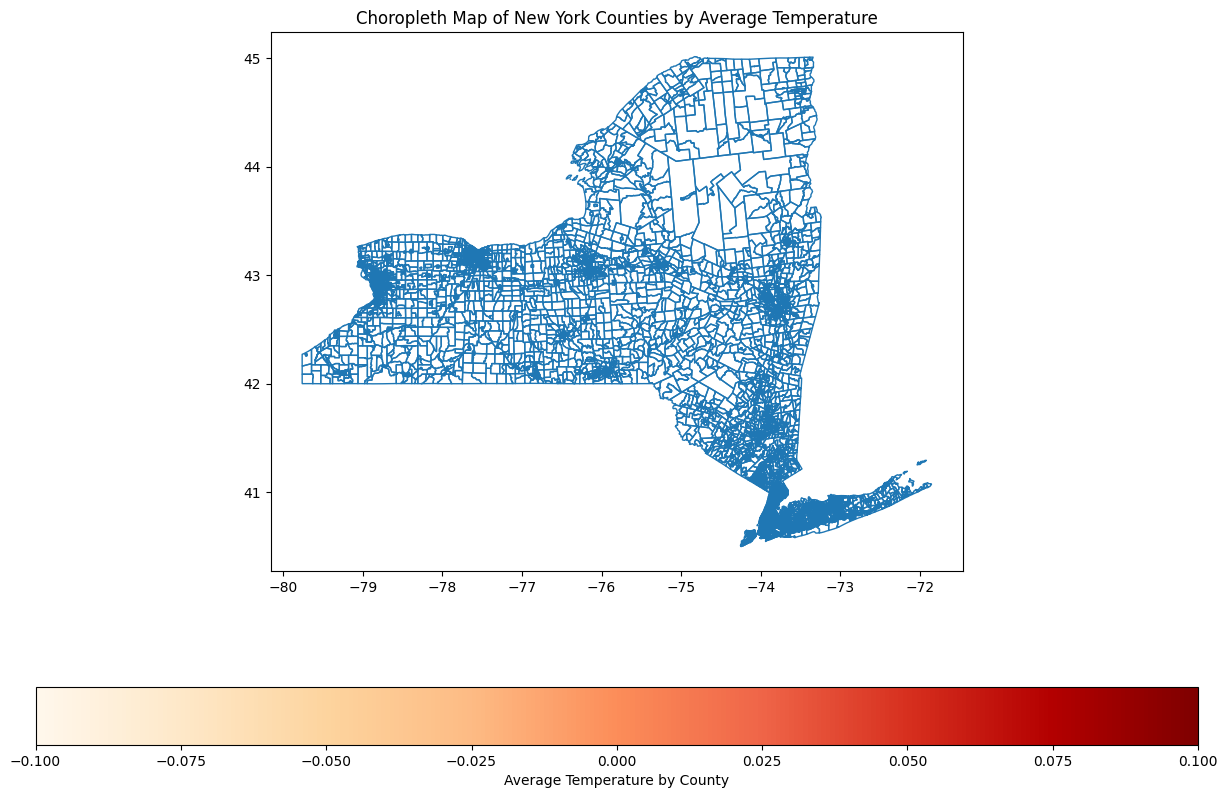

In [338]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the CSV data
data = pd.read_csv(r"C:\Users\steph\Desktop\ICDS Final\datasets\merged_data.csv")

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries.from_wkt(data['geometry']))

# Load New York counties shapefile
ny_counties = gpd.read_file(r'C:\Users\steph\Desktop\ICDS Final\GIS\cb_2018_36_bg_500k.shp')

# Merge the data on a common key (e.g., county name)
merged = ny_counties.merge(gdf, left_on='NAME', right_on='County', how='left')

# Set the active geometry column
# Choose either 'geometry_x' or 'geometry_y' based on which one contains the correct geometries
merged.set_geometry('geometry_x', inplace=True)  # Adjust this if necessary

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.boundary.plot(ax=ax, linewidth=1)
merged.plot(column='TAVG', ax=ax, legend=True,
            legend_kwds={'label': "Average Temperature by County",
                         'orientation': "horizontal"},
            cmap='OrRd')

plt.title('Choropleth Map of New York Counties by Average Temperature')
plt.show()
